
# Topic Modeling


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
import numpy as np

# 데이터 로드
df = pd.read_csv("/content/drive/MyDrive/4-1/school_report_1028.csv")

# report 열의 문자열을 리스트로 변환
df['report'] = df['report'].apply(eval)

# 제외할 단어 리스트
exclude_words = ['대학', '산학', '협력', '산학연협력', '산학연']

# Co-occurrence 행렬 생성
vectorizer = CountVectorizer(tokenizer=lambda x: x, lowercase=False)  # 형태소 단위로 벡터화
X = vectorizer.fit_transform(df['report'])
terms = vectorizer.get_feature_names_out()

# 특정 키워드의 인덱스 찾기
keyword = "벤처"
if keyword in terms:
    keyword_index = np.where(terms == keyword)[0][0]

    # 공기 행렬을 사용하여 키워드와 함께 등장하는 단어의 빈도 추출
    co_occurrence = (X.T * X).toarray()  # 단어-단어 공기 행렬
    co_occurrence[keyword_index, keyword_index] = 0  # 자기 자신 제외

    # 제외할 단어들의 인덱스 찾기
    exclude_indices = [i for i, term in enumerate(terms) if term in exclude_words]

    # 키워드와 자주 함께 등장하는 상위 단어 출력
    # 제외할 단어들을 필터링하면서 상위 단어 선택
    filtered_indices = []
    i = 0
    while len(filtered_indices) < 10:  # 상위 10개 단어를 찾을 때까지
        idx = co_occurrence[keyword_index].argsort()[-(i+1)]
        if idx not in exclude_indices:
            filtered_indices.append(idx)
        i += 1
        if i >= len(terms):  # 모든 단어를 확인했으면 종료
            break

    top_words = [(terms[idx], co_occurrence[keyword_index, idx]) for idx in filtered_indices]
else:
    top_words = "Keyword '산학연협력' not found in the data."

top_words

0it [03:30, ?it/s]
0it [02:10, ?it/s]
0it [04:18, ?it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[('창업', 524),
 ('기업', 329),
 ('기술', 233),
 ('지원', 158),
 ('투자', 147),
 ('센터', 107),
 ('연계', 104),
 ('운영', 98),
 ('사업', 94),
 ('지역', 86)]

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 123777 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fo

<ipython-input-73-ea9974d21bf8>:31: UserWarning: Glyph 52285 (\N{HANGUL SYLLABLE CANG}) missing from current font.
  plt.tight_layout()
<ipython-input-73-ea9974d21bf8>:31: UserWarning: Glyph 50629 (\N{HANGUL SYLLABLE EOB}) missing from current font.
  plt.tight_layout()
<ipython-input-73-ea9974d21bf8>:31: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  plt.tight_layout()
<ipython-input-73-ea9974d21bf8>:31: UserWarning: Glyph 49696 (\N{HANGUL SYLLABLE SUL}) missing from current font.
  plt.tight_layout()
<ipython-input-73-ea9974d21bf8>:31: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  plt.tight_layout()
<ipython-input-73-ea9974d21bf8>:31: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  plt.tight_layout()
<ipython-input-73-ea9974d21bf8>:31: UserWarning: Glyph 53804 (\N{HANGUL SYLLABLE TU}) missing from current font.
  plt.tight_layout()
<ipython-input-73-ea9974d21bf8>:31: UserWarning: Glyph 5

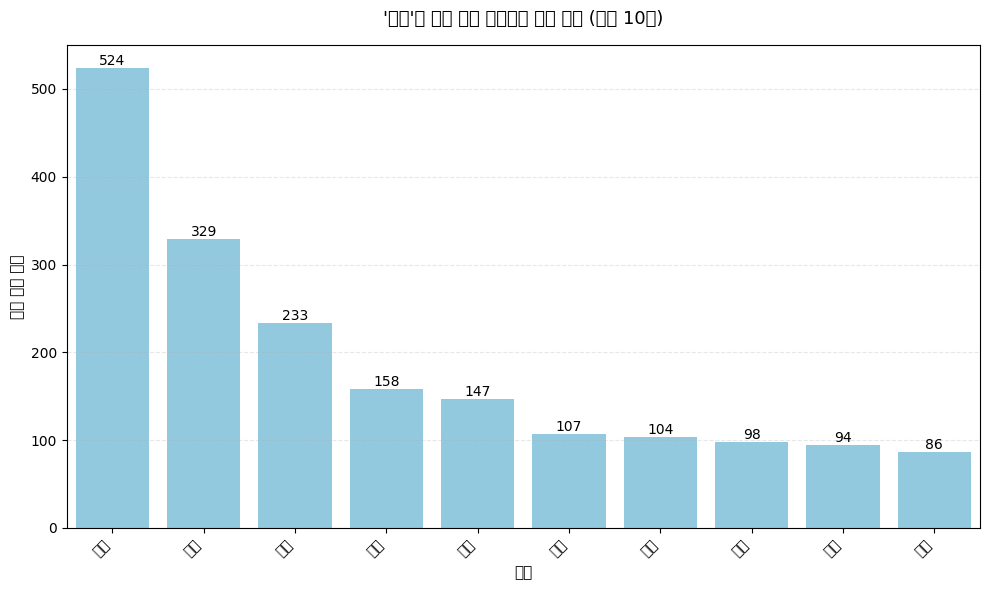


상위 동시 출현 단어 및 빈도:
창업: 524회
기업: 329회
기술: 233회
지원: 158회
투자: 147회
센터: 107회
연계: 104회
운영: 98회
사업: 94회
지역: 86회


In [ ]:
# 한글 폰트(나눔고딕) 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.pyplot as plt
import seaborn as sns

# 기본 폰트 변경
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

# 결과를 데이터프레임으로 변환
df_viz = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=df_viz, x='Word', y='Frequency', color='skyblue')

# 빈도수 텍스트 추가
for i, v in enumerate(df_viz['Frequency']):
    plt.text(i, v, str(int(v)), ha='center', va='bottom')

# 제목과 레이블 설정
plt.title(f"'{keyword}'와 자주 함께 등장하는 상위 단어 (상위 10개)", pad=15, fontsize=13)
plt.xlabel('단어', fontsize=11)
plt.ylabel('동시 출현 빈도', fontsize=11)

# x축 레이블 회전
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# 결과 출력
print("\n상위 동시 출현 단어 및 빈도:")
for word, freq in top_words:
    print(f"{word}: {int(freq)}회")

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

df = pd.read_csv("/content/drive/MyDrive/4-1/school_report_1028.csv")
df['report'] = df['report'].apply(eval)
df['report_str'] = df['report'].apply(lambda x: ' '.join(x))

# Step 1: 상위 군집 단어 설정 및 필터링
top_words = [ '창업', '벤처', '기술', '기업', '지원']

# 상위 군집 단어들이 포함된 문서 필터링
df_filtered = df[df['report_str'].apply(lambda x: sum(word in x for word in top_words) >= 3)].copy()

# Step 2: 필터링된 문서에서 토픽 모델링
count_vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words=['의', '이', '에', '를', '과', '은', '는', '있다', '하여', '및', '하다'])
count_data = count_vectorizer.fit_transform(df_filtered['report_str'])

# LDA 모델 설정 및 학습
num_topics = 7  # 생성할 하위 군집 (세부 토픽) 수
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(count_data)

# Step 3: 각 토픽에서 상위 군집 단어가 포함된 하위 단어들 추출
lda_feature_names = count_vectorizer.get_feature_names_out()

def extract_related_words(model, feature_names, top_words, n_top_words=6):
    sub_topics = []
    for topic_idx, topic in enumerate(model.components_):
        # 각 토픽에서 상위 단어와 관련 있는 하위 단어만 추출
        related_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1] if feature_names[i] not in top_words]
        sub_topics.append(related_words)
    return sub_topics

# 상위 군집을 포함한 하위 군집 단어 추출
sub_topics = extract_related_words(lda_model, lda_feature_names, top_words, n_top_words=6)

# 결과 출력
for i, sub_topic in enumerate(sub_topics):
    print(f"\nT{i+1} 하위 군집:", sub_topic)



T1 하위 군집: ['수요', '사업', '지역']

T2 하위 군집: ['센터', '산학협력', '협업']

T3 하위 군집: ['개발', '공동', '사업']

T4 하위 군집: ['육성']

T5 하위 군집: ['강화', '역량', '계획']

T6 하위 군집: ['사업', '투자']

T7 하위 군집: ['프로그램', '운영']


In [ ]:
len(df_filtered)

5295

# KoBERT+CTM을 이용한 토픽 모델링
based on

1.   Consistency Trajectory Model (CTM)
      https://github.com/sony/ctm

2.   Pre-training is a Hot Topic: Contextualized Document Embeddings Improve Topic Coherence

   Federico Bianchi, Silvia Terragni, Dirk Hovy

   https://arxiv.org/abs/2004.03974

In [ ]:
!pip install contextualized-topic-models==2.2.0
!pip install pyldavis

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/4-1/school_report_1028.csv")
df['report'] = df['report'].apply(eval)

# report 리스트를 문자열로 변환
df['report_str'] = df['report'].apply(lambda x: ' '.join(x))

# 상위 군집 단어 설정
top_words = [ '창업', '기술', '특허', '연구', '벤처', '투자', '대학원']

# 상위 군집 단어 중 2개 이상 포함된 문서 필터링
def count_top_words(text):
    return sum(word in text for word in top_words)

df_filtered = df[df['report_str'].apply(count_top_words) >= 2].copy()

print(f"상위 군집 단어 2개 이상 포함된 문서 수: {len(df_filtered)}")


0it [06:37, ?it/s]


상위 군집 단어 2개 이상 포함된 문서 수: 13377


In [ ]:
!pip install contextualized-topic-models==2.2.0

In [ ]:
!pip install pyldavis

In [ ]:
from contextualized_topic_models.models.ctm import CombinedTM
from contextualized_topic_models.utils.data_preparation import TopicModelDataPreparation, bert_embeddings_from_list
from contextualized_topic_models.utils.preprocessing import WhiteSpacePreprocessing
from sklearn.feature_extraction.text import CountVectorizer
from tqdm import tqdm

In [ ]:
class CustomTokenizer:
    def __init__(self, tagger):
        self.tagger = tagger
    def __call__(self, sent):
        word_tokens = self.tagger.morphs(sent)
        result = [word for word in word_tokens if len(word) > 1]
        return result

In [ ]:
preprocessed_documents = []

for line in tqdm(df_filtered['report_str']):
  # 빈 문자열이거나 숫자로만 이루어진 줄은 제외
  if line and not line.replace(' ', '').isdecimal():
    preprocessed_documents.append(line)


100%|██████████| 13377/13377 [00:00<00:00, 685002.74it/s]


In [ ]:
len(preprocessed_documents)

13377

In [ ]:
custom_tokenizer = CustomTokenizer(Mecab())

In [ ]:
vectorizer = CountVectorizer(tokenizer=custom_tokenizer, max_features=3000)

In [ ]:
train_bow_embeddings = vectorizer.fit_transform(preprocessed_documents)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
print(train_bow_embeddings.shape)

(13377, 3000)


In [ ]:
vocab = vectorizer.get_feature_names_out()
id2token = {k: v for k, v in zip(range(0, len(vocab)), vocab)}

In [ ]:
len(vocab)

3000

In [ ]:
train_contextualized_embeddings = bert_embeddings_from_list(preprocessed_documents, \
                                                            "snunlp/KR-SBERT-V40K-klueNLI-augSTS")

Batches:   0%|          | 0/67 [00:00<?, ?it/s]

In [ ]:
qt = TopicModelDataPreparation()

training_dataset = qt.load(train_contextualized_embeddings, train_bow_embeddings, id2token )

In [ ]:
print("Dataset size:", len(training_dataset))

Dataset size: 13377


In [ ]:
ctm = CombinedTM(bow_size=len(vocab), contextual_size=768, n_components=5, num_epochs=20, batch_size=100)
ctm.fit(training_dataset)

Epoch: [20/20]	 Seen Samples: [267540/267540]	Train Loss: 109.11971807953951	Time: 0:00:04.751227: : 20it [01:43,  5.15s/it]


In [ ]:
# 모델 저장
ctm.save('/content/drive/MyDrive/4-1/ctm_model_1212')

In [ ]:
ctm.get_topics(5)

defaultdict(list,
            {0: ['회대', '사업체', '서울대', '정강화', '해양저'],
             1: ['산학', '기술', '과제', '연구', '공동'],
             2: ['투자', '지주회사', '창업', '보육', '펀드'],
             3: ['회대', '사업체', '서울대', '천연물', '해양저'],
             4: ['산학협력', '대학', '분야', '산업', '교육']})

In [ ]:
ctm.get_topics(10)

defaultdict(list,
            {0: ['회대',
              '사업체',
              '서울대',
              '정강화',
              '해양저',
              '장소',
              '세일즈',
              '금유',
              '처리',
              '제휴'],
             1: ['산학', '기술', '과제', '연구', '공동', '개발', '수행', '수요', '관리', '연구비'],
             2: ['투자', '지주회사', '창업', '보육', '펀드', '기업', '지원', '대학', '유치', '사업'],
             3: ['회대',
              '사업체',
              '서울대',
              '천연물',
              '해양저',
              '정강화',
              '세일즈',
              '장소',
              '순천',
              '패밀리'],
             4: ['산학협력',
              '대학',
              '분야',
              '산업',
              '교육',
              '연계',
              '과정',
              '협력',
              '구축',
              '혁신']})

In [ ]:
reference_topics = {
    'Parent': ['산학협력', '계획', '운영', '지원', '사업', '교육'],
    'Child': {
        0: ['교육', '과정', '수요', '산업체', '운영'],
        1: ['친화형', '환경', '현황', '업체', '효과'],
        2: ['건수', '등선', '메타버스', '인공지능', '견학'],
        3: ['기술', '사업', '지원', '공동', '산학'],
        4: ['위원회', '평가', '조직', '산학협력단', '교원']
    }
}

참조 토픽 임베딩 계산 중...
대학별 분석 중...


100%|██████████| 22955/22955 [34:17<00:00, 11.16it/s]
<ipython-input-156-d4394218acba>:100: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  plt.tight_layout()
<ipython-input-156-d4394218acba>:100: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  plt.tight_layout()
<ipython-input-156-d4394218acba>:100: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  plt.tight_layout()
<ipython-input-156-d4394218acba>:100: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from current font.
  plt.tight_layout()
<ipython-input-156-d4394218acba>:100: UserWarning: Glyph 54589 (\N{HANGUL SYLLABLE PIG}) missing from current font.
  plt.tight_layout()
<ipython-input-156-d4394218acba>:100: UserWarning: Glyph 52852 (\N{HANGUL SYLLABLE KA}) missing from current font.
  plt.tight_layout()
<ipython-input-156-d4394218acba>:100: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from current font.
  plt.tig


분석 결과:
              Parent_Topic   Child_0   Child_1   Child_2   Child_3   Child_4
sogang            0.563195  0.510714  0.463351  0.352924  0.537711  0.506389
hanyang           0.579955  0.518735  0.477516  0.350978  0.542684  0.516634
sungkyunkwan      0.553198  0.498755  0.461183  0.351231  0.528521  0.502762
pusan             0.550965  0.490543  0.459924  0.347767  0.536196  0.499346
mokpo             0.551038  0.502997  0.459526  0.350395  0.523331  0.489656


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  def mpl_runner(safe_execfile):
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  def mpl_runner(safe_execfile):
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  def mpl_runner(safe_execfile):
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from current font.
  def mpl_runner(safe_execfile):
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54589 (\N{HANGUL SYLLABLE PIG}) missing from current font.
  def mpl_runner(safe_execfile):
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

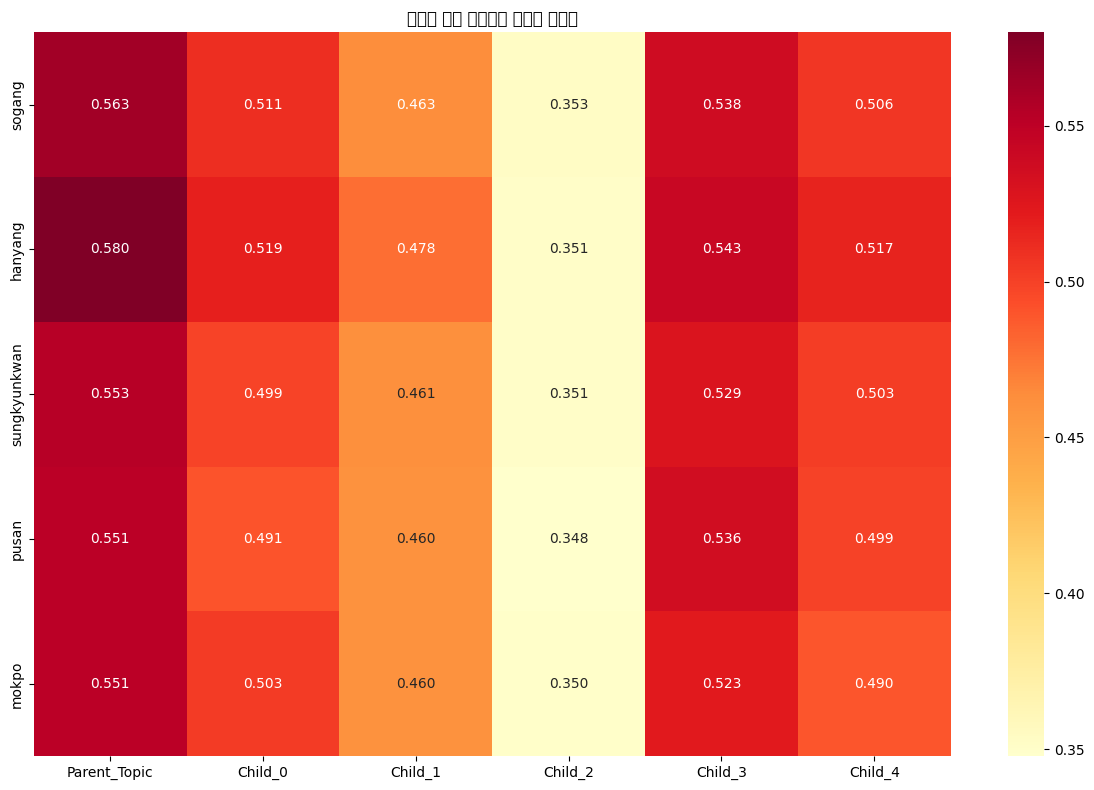

<ipython-input-156-d4394218acba>:109: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  plt.tight_layout()
<ipython-input-156-d4394218acba>:109: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  plt.tight_layout()
<ipython-input-156-d4394218acba>:109: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  plt.tight_layout()
<ipython-input-156-d4394218acba>:109: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from current font.
  plt.tight_layout()
<ipython-input-156-d4394218acba>:109: UserWarning: Glyph 54589 (\N{HANGUL SYLLABLE PIG}) missing from current font.
  plt.tight_layout()
<ipython-input-156-d4394218acba>:109: UserWarning: Glyph 52852 (\N{HANGUL SYLLABLE KA}) missing from current font.
  plt.tight_layout()
<ipython-input-156-d4394218acba>:109: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from current font.
  plt.tight_layout()
<ipython-input-156-d4394218acba>:109: User

<Figure size 1500x600 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  def mpl_runner(safe_execfile):
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  def mpl_runner(safe_execfile):
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  def mpl_runner(safe_execfile):
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from current font.
  def mpl_runner(safe_execfile):
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54589 (\N{HANGUL SYLLABLE PIG}) missing from current font.
  def mpl_runner(safe_execfile):
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

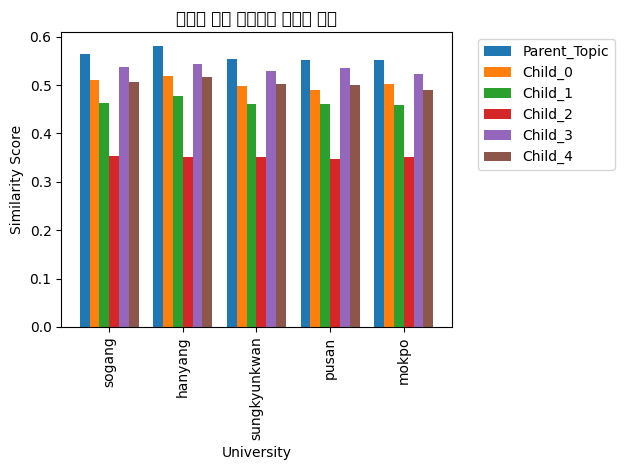

In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer
import torch
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SentenceTransformer('snunlp/KR-SBERT-V40K-klueNLI-augSTS').to(device)

def safe_eval(text):
   try:
       if isinstance(text, str):
           return ast.literal_eval(text)
       return text
   except:
       return []

def compute_reference_embeddings(reference_topics):
   print("참조 토픽 임베딩 계산 중...")
   with torch.no_grad():
       parent_embeddings = model.encode(reference_topics['Parent'], convert_to_tensor=True).to(device)
       child_embeddings = {}
       for category, topics in reference_topics['Child'].items():
           child_embeddings[category] = model.encode(topics, convert_to_tensor=True).to(device)
   return parent_embeddings, child_embeddings

def analyze_report_gpu(report_topics, reference_embeddings):
   try:
       if not report_topics:
           return 0.0

       with torch.no_grad():
           report_embeddings = model.encode(report_topics, convert_to_tensor=True).to(device)

           similarities = torch.cosine_similarity(
               report_embeddings.unsqueeze(1),
               reference_embeddings.unsqueeze(0),
               dim=2
           )

           max_similarities = torch.max(similarities, dim=1)[0]
           return max_similarities.mean().item()

   except Exception as e:
       print(f"Error processing report: {e}")
       return 0.0

def evaluate_universities(df, universities, parent_embeddings, child_embeddings):
   results = {}

   filtered_df = df[df['school'].isin(universities)]

   print("대학별 분석 중...")
   for _, row in tqdm(filtered_df.iterrows(), total=len(filtered_df)):
       school = row['school']
       report_topics = safe_eval(row['report'])

       if not report_topics:
           continue

       # 상위 토픽 분석
       parent_score = analyze_report_gpu(report_topics, parent_embeddings)

       # 하위 토픽 분석
       child_scores = {}
       for category, embeddings in child_embeddings.items():
           child_scores[f'Child_{category}'] = analyze_report_gpu(report_topics, embeddings)

       if school not in results:
           results[school] = []
       results[school].append({'Parent_Topic': parent_score, **child_scores})

   final_results = {}
   for school, scores_list in results.items():
       avg_scores = {}
       for key in scores_list[0].keys():
           avg_scores[key] = np.mean([score[key] for score in scores_list])
       final_results[school] = avg_scores

   return pd.DataFrame.from_dict(final_results, orient='index')

# 대학 리스트
target_universities = ['sogang', 'hanyang', 'sungkyunkwan', 'mokpo', 'pusan']

torch.cuda.empty_cache()

parent_embeddings, child_embeddings = compute_reference_embeddings(reference_topics)

results_df = evaluate_universities(df, target_universities, parent_embeddings, child_embeddings)

print("\n분석 결과:")
print(results_df)

plt.figure(figsize=(12, 8))
sns.heatmap(results_df, annot=True, cmap='YlOrRd', fmt='.3f')
plt.title('대학별 토픽 카테고리 유사도 히트맵')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 6))
results_df.plot(kind='bar', width=0.8)
plt.title('대학별 토픽 카테고리 유사도 비교')
plt.xlabel('University')
plt.ylabel('Similarity Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
new_reference_topics = {
    'Parent': ['산학협력', '계획', '운영', '지원', '사업', '교육'],
    'Child': {
        0: ['교육과정', '실무교육', '현장실습', '직무역량', '산업수요'],
        1: ['산학친화', '협력문화', '기업환경', '지역연계', '상생발전'],
        2: ['첨단기술', '디지털전환', '메타버스', '인공지능', '신산업'],
        3: ['기술이전', '공동연구', '특허출원', '기술사업화', '연구협력'],
        4: ['운영체계', '위원회', '성과평가', '산학협력단', '전담인력']
    }
}

참조 토픽 임베딩 계산 중...
대학별 분석 중...


100%|██████████| 22955/22955 [33:23<00:00, 11.46it/s]



분석 결과:
              Parent_Topic   Child_0   Child_1   Child_2   Child_3   Child_4
sogang            0.563195  0.412948  0.414759  0.347995  0.393852  0.455290
hanyang           0.579955  0.420201  0.424061  0.353363  0.394044  0.465960
sungkyunkwan      0.553198  0.417328  0.408993  0.344960  0.383350  0.450081
pusan             0.550965  0.403057  0.405333  0.342791  0.386373  0.446971
mokpo             0.551038  0.402102  0.398916  0.336969  0.378410  0.442599


<ipython-input-164-d2ef99076ae6>:100: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  plt.tight_layout()
<ipython-input-164-d2ef99076ae6>:100: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  plt.tight_layout()
<ipython-input-164-d2ef99076ae6>:100: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  plt.tight_layout()
<ipython-input-164-d2ef99076ae6>:100: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from current font.
  plt.tight_layout()
<ipython-input-164-d2ef99076ae6>:100: UserWarning: Glyph 54589 (\N{HANGUL SYLLABLE PIG}) missing from current font.
  plt.tight_layout()
<ipython-input-164-d2ef99076ae6>:100: UserWarning: Glyph 52852 (\N{HANGUL SYLLABLE KA}) missing from current font.
  plt.tight_layout()
<ipython-input-164-d2ef99076ae6>:100: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from current font.
  plt.tight_layout()
<ipython-input-164-d2ef99076ae6>:100: User

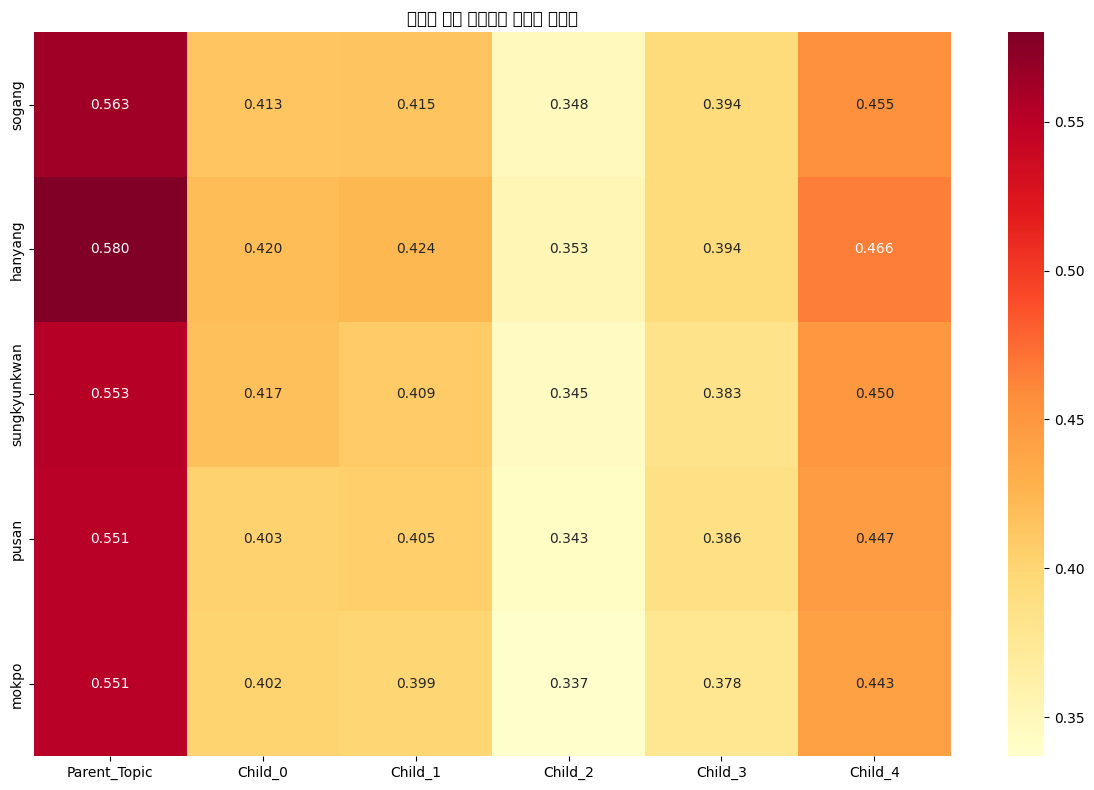

<ipython-input-164-d2ef99076ae6>:109: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  plt.tight_layout()
<ipython-input-164-d2ef99076ae6>:109: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  plt.tight_layout()
<ipython-input-164-d2ef99076ae6>:109: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  plt.tight_layout()
<ipython-input-164-d2ef99076ae6>:109: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from current font.
  plt.tight_layout()
<ipython-input-164-d2ef99076ae6>:109: UserWarning: Glyph 54589 (\N{HANGUL SYLLABLE PIG}) missing from current font.
  plt.tight_layout()
<ipython-input-164-d2ef99076ae6>:109: UserWarning: Glyph 52852 (\N{HANGUL SYLLABLE KA}) missing from current font.
  plt.tight_layout()
<ipython-input-164-d2ef99076ae6>:109: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from current font.
  plt.tight_layout()
<ipython-input-164-d2ef99076ae6>:109: User

<Figure size 1500x600 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  def mpl_runner(safe_execfile):
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  def mpl_runner(safe_execfile):
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  def mpl_runner(safe_execfile):
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from current font.
  def mpl_runner(safe_execfile):
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54589 (\N{HANGUL SYLLABLE PIG}) missing from current font.
  def mpl_runner(safe_execfile):
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

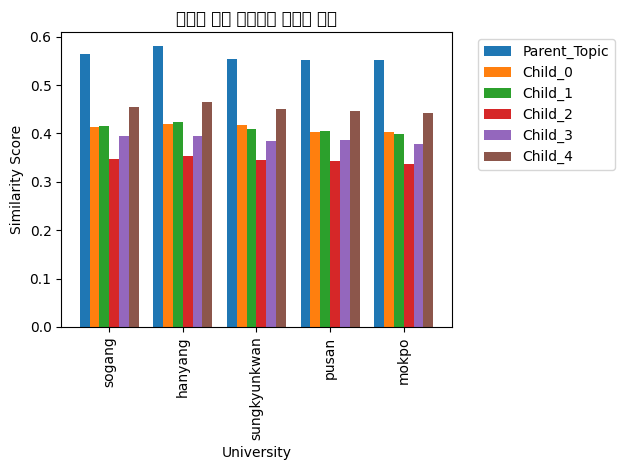

In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer
import torch
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SentenceTransformer('snunlp/KR-SBERT-V40K-klueNLI-augSTS').to(device)

def safe_eval(text):
   try:
       if isinstance(text, str):
           return ast.literal_eval(text)
       return text
   except:
       return []

def compute_reference_embeddings(reference_topics):
   print("참조 토픽 임베딩 계산 중...")
   with torch.no_grad():
       parent_embeddings = model.encode(reference_topics['Parent'], convert_to_tensor=True).to(device)
       child_embeddings = {}
       for category, topics in reference_topics['Child'].items():
           child_embeddings[category] = model.encode(topics, convert_to_tensor=True).to(device)
   return parent_embeddings, child_embeddings

def analyze_report_gpu(report_topics, reference_embeddings):
   try:
       if not report_topics:
           return 0.0

       with torch.no_grad():
           report_embeddings = model.encode(report_topics, convert_to_tensor=True).to(device)

           similarities = torch.cosine_similarity(
               report_embeddings.unsqueeze(1),
               reference_embeddings.unsqueeze(0),
               dim=2
           )

           max_similarities = torch.max(similarities, dim=1)[0]
           return max_similarities.mean().item()

   except Exception as e:
       print(f"Error processing report: {e}")
       return 0.0

def evaluate_universities(df, universities, parent_embeddings, child_embeddings):
   results = {}

   filtered_df = df[df['school'].isin(universities)]

   print("대학별 분석 중...")
   for _, row in tqdm(filtered_df.iterrows(), total=len(filtered_df)):
       school = row['school']
       report_topics = safe_eval(row['report'])

       if not report_topics:
           continue

       # 상위 토픽 분석
       parent_score = analyze_report_gpu(report_topics, parent_embeddings)

       # 하위 토픽 분석
       child_scores = {}
       for category, embeddings in child_embeddings.items():
           child_scores[f'Child_{category}'] = analyze_report_gpu(report_topics, embeddings)

       if school not in results:
           results[school] = []
       results[school].append({'Parent_Topic': parent_score, **child_scores})

   final_results = {}
   for school, scores_list in results.items():
       avg_scores = {}
       for key in scores_list[0].keys():
           avg_scores[key] = np.mean([score[key] for score in scores_list])
       final_results[school] = avg_scores

   return pd.DataFrame.from_dict(final_results, orient='index')

# 대학 리스트
target_universities = ['sogang', 'hanyang', 'sungkyunkwan', 'mokpo', 'pusan']

torch.cuda.empty_cache()

parent_embeddings, child_embeddings = compute_reference_embeddings(new_reference_topics)

results_df = evaluate_universities(df, target_universities, parent_embeddings, child_embeddings)

print("\n분석 결과:")
print(results_df)

plt.figure(figsize=(12, 8))
sns.heatmap(results_df, annot=True, cmap='YlOrRd', fmt='.3f')
plt.title('대학별 토픽 카테고리 유사도 히트맵')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 6))
results_df.plot(kind='bar', width=0.8)
plt.title('대학별 토픽 카테고리 유사도 비교')
plt.xlabel('University')
plt.ylabel('Similarity Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Sogang 데이터:
      school                                             report
5516  sogang                                       ['사업', '유형']
5517  sogang                                 ['수요', '맞춤', '장형']
5518  sogang                                             ['권역']
5519  sogang                                             ['수도']
5520  sogang  ['단계', '산학연협력', '선도', '대학', '육성', '사업', '수정', ...

참조 토픽: ['산학협력', '계획', '운영', '지원', '사업', '교육', '교육', '과정', '수요', '산업체', '운영', '친화형', '환경', '현황', '업체', '효과', '건수', '등선', '메타버스', '인공지능', '견학', '기술', '사업', '지원', '공동', '산학', '위원회', '평가', '조직', '산학협력단', '교원']


Epoch: [5/20]	 Seen Samples: [384340/1537360]	Train Loss: 75.83724668456854	Time: 0:00:31.749708: : 5it [55:42, 668.48s/it]
<ipython-input-148-405d0c9da215>:88: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  plt.tight_layout()
<ipython-input-148-405d0c9da215>:88: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  plt.tight_layout()
<ipython-input-148-405d0c9da215>:88: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from current font.
  plt.tight_layout()
<ipython-input-148-405d0c9da215>:88: UserWarning: Glyph 54589 (\N{HANGUL SYLLABLE PIG}) missing from current font.
  plt.tight_layout()
<ipython-input-148-405d0c9da215>:88: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from current font.
  plt.tight_layout()



Sogang 카테고리별 상세 분석:
         상위_토픽      하위_0      하위_1      하위_2      하위_3      하위_4
5516  0.755897  0.563225  0.550258  0.344480  0.742708  0.610234
5517  0.431827  0.616229  0.469654  0.358503  0.430264  0.438141
5518  0.452830  0.393978  0.449333  0.285121  0.387405  0.561343
5519  0.369270  0.289712  0.431094  0.282230  0.373595  0.374530
5520  0.700627  0.536049  0.497799  0.351642  0.649954  0.541669
...        ...       ...       ...       ...       ...       ...
9486  0.515568  0.513455  0.483492  0.344671  0.481454  0.463267
9487  0.538811  0.458037  0.458606  0.323072  0.537198  0.507889
9488  0.505455  0.424541  0.448416  0.315560  0.543248  0.502790
9489  0.582736  0.559788  0.502035  0.333634  0.528592  0.497602
9490  0.517346  0.449071  0.440681  0.328168  0.538210  0.491528

[3975 rows x 6 columns]


<ipython-input-148-405d0c9da215>:88: UserWarning: Glyph 52852 (\N{HANGUL SYLLABLE KA}) missing from current font.
  plt.tight_layout()
<ipython-input-148-405d0c9da215>:88: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from current font.
  plt.tight_layout()
<ipython-input-148-405d0c9da215>:88: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  plt.tight_layout()
<ipython-input-148-405d0c9da215>:88: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  plt.tight_layout()
<ipython-input-148-405d0c9da215>:88: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  plt.tight_layout()
<ipython-input-148-405d0c9da215>:88: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  plt.tight_layout()
<ipython-input-148-405d0c9da215>:88: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  plt.tight_layout()
<ipython-input-148-405d0c9da215>:88: UserWarning: Gl

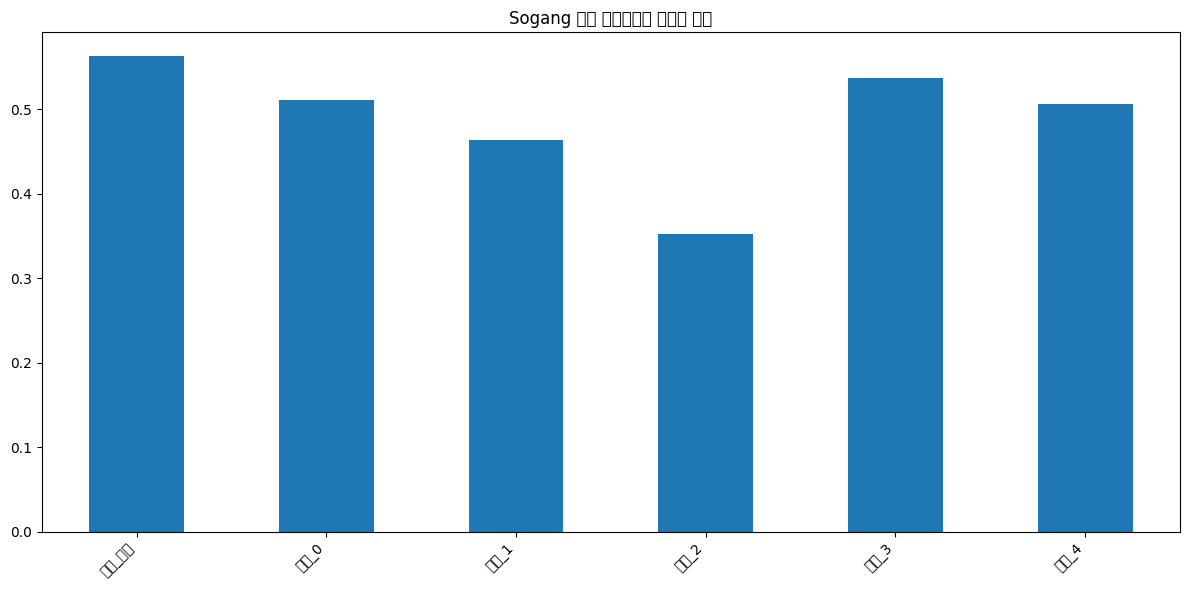

In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer
import torch
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns

# SBERT 모델 로드
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = SentenceTransformer('snunlp/KR-SBERT-V40K-klueNLI-augSTS', device=device)

def safe_eval(text):
    """문자열 리스트를 안전하게 파싱"""
    try:
        if isinstance(text, str):
            return ast.literal_eval(text)
        return text
    except:
        return []

def analyze_report(row, reference_topics):
    """각 보고서 항목의 토픽과 참조 토픽 간의 유사도 분석"""
    try:
        report_topics = safe_eval(row['report'])

        if not report_topics:
            print(f"Warning: Empty topics for row: {row['school']}")
            return 0.0

        report_embeddings = model.encode(report_topics, convert_to_tensor=True).cpu()
        reference_embeddings = model.encode(reference_topics, convert_to_tensor=True).cpu()

        similarities = torch.cosine_similarity(
            report_embeddings.unsqueeze(1),
            reference_embeddings.unsqueeze(0),
            dim=2
        )

        max_similarities = torch.max(similarities, dim=1)[0]
        return max_similarities.mean().item()

    except Exception as e:
        print(f"Error processing school {row['school']}: {e}")
        return 0.0

# sogang 데이터만 필터링
sogang_df = df[df['school'] == 'sogang']

print("Sogang 데이터:")
print(sogang_df[['school', 'report']].head())

# 참조 토픽 준비
all_reference_topics = (
    reference_topics['상위'] +
    [topic for sublist in reference_topics['하위'].values() for topic in sublist]
)

print("\n참조 토픽:", all_reference_topics)

# sogang 카테고리별 분석
def evaluate_sogang_by_category(row):
    category_results = {}
    report_topics = safe_eval(row['report'])

    if not report_topics:
        return pd.Series({'상위_토픽': 0.0})

    # 상위 토픽과의 유사도
    category_results['상위_토픽'] = analyze_report(row, reference_topics['상위'])

    # 하위 카테고리별 유사도
    for category, topics in reference_topics['하위'].items():
        category_results[f'하위_{category}'] = analyze_report(row, topics)

    return pd.Series(category_results)

# sogang 분석 실행
sogang_analysis = sogang_df.apply(evaluate_sogang_by_category, axis=1)
print("\nSogang 카테고리별 상세 분석:")
print(sogang_analysis)

# 시각화
plt.figure(figsize=(12, 6))
sogang_analysis.mean().plot(kind='bar')
plt.title('Sogang 토픽 카테고리별 유사도 점수')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()